In [1]:
datadir = "/Users/anna.schaar/phd/datasets/lohoff"

In [2]:
import pandas as pd
from anndata import AnnData
import scanpy as sc
import numpy as np

In [3]:
metadata = pd.read_csv(datadir + '/metadata.csv', index_col=0)

In [27]:
metadata = metadata[-row_has_NaN]

In [28]:
metadata

,uniqueID,embryo,pos,z,x_global,y_global,x_global_affine,y_global_affine,embryo_pos,embryo_pos_z,Area,UMAP1,UMAP2,celltype_mapped_refined
embryo1_Pos0_cell10_z2,embryo1_Pos0_cell10_z2,embryo1,Pos0,2,1617.848704,1350.056363,0.729261,-2.821746,embryo1_Pos0,embryo1_Pos0_2,10400,-6.361522,-1.462083,Low quality
embryo1_Pos0_cell10_z5,embryo1_Pos0_cell10_z5,embryo1,Pos0,5,1617.203165,1353.609567,0.708437,-2.707126,embryo1_Pos0,embryo1_Pos0_5,2256,1.109983,-4.316021,Lateral plate mesoderm
embryo1_Pos0_cell100_z2,embryo1_Pos0_cell100_z2,embryo1,Pos0,2,1625.055128,1346.268007,0.961726,-2.943951,embryo1_Pos0,embryo1_Pos0_2,8144,-6.462337,-1.034258,Erythroid
embryo1_Pos0_cell100_z5,embryo1_Pos0_cell100_z5,embryo1,Pos0,5,1625.507056,1359.473374,0.976304,-2.517971,embryo1_Pos0,embryo1_Pos0_5,6592,0.971561,-4.535042,Lateral plate mesoderm
embryo1_Pos0_cell101_z2,embryo1_Pos0_cell101_z2,embryo1,Pos0,2,1624.997889,1344.508417,0.959880,-3.000712,embryo1_Pos0,embryo1_Pos0_2,8560,-6.810907,-0.845417,Erythroid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
embryo3_Pos39_cell95_z5,embryo3_Pos39_cell95_z5,embryo3,Pos39,5,1453.327460,1519.609597,2.840420,-0.492324,embryo3_Pos39,embryo3_Pos39_5,9024,-0.201332,4.399463,Low quality
embryo3_Pos39_cell96_z5,embryo3_Pos39_cell96_z5,embryo3,Pos39,5,1454.319663,1487.879936,2.729414,-0.975761,embryo3_Pos39,embryo3_Pos39_5,13472,0.547916,2.511323,Presomitic mesoderm
embryo3_Pos39_cell97_z2,embryo3_Pos39_cell97_z2,embryo3,Pos39,2,1453.352235,1481.964994,2.726387,-1.069361,embryo3_Pos39,embryo3_Pos39_2,5392,-0.319074,-0.355824,Presomitic mesoderm
embryo3_Pos39_cell98_z5,embryo3_Pos39_cell98_z5,embryo3,Pos39,5,1453.996256,1523.472893,2.841830,-0.431078,embryo3_Pos39,embryo3_Pos39_5,10016,0.449086,2.671902,Presomitic mesoderm


In [5]:
{x : x for x in list(np.unique(metadata['celltype_mapped_refined']))}

{'Allantois': 'Allantois',
 'Anterior somitic tissues': 'Anterior somitic tissues',
 'Blood progenitors': 'Blood progenitors',
 'Cardiomyocytes': 'Cardiomyocytes',
 'Cranial mesoderm': 'Cranial mesoderm',
 'Definitive endoderm': 'Definitive endoderm',
 'Dermomyotome': 'Dermomyotome',
 'Endothelium': 'Endothelium',
 'Erythroid': 'Erythroid',
 'ExE endoderm': 'ExE endoderm',
 'Forebrain/Midbrain/Hindbrain': 'Forebrain/Midbrain/Hindbrain',
 'Gut tube': 'Gut tube',
 'Haematoendothelial progenitors': 'Haematoendothelial progenitors',
 'Intermediate mesoderm': 'Intermediate mesoderm',
 'Lateral plate mesoderm': 'Lateral plate mesoderm',
 'Low quality': 'Low quality',
 'Mixed mesenchymal mesoderm': 'Mixed mesenchymal mesoderm',
 'NMP': 'NMP',
 'Neural crest': 'Neural crest',
 'Presomitic mesoderm': 'Presomitic mesoderm',
 'Sclerotome': 'Sclerotome',
 'Spinal cord': 'Spinal cord',
 'Splanchnic mesoderm': 'Splanchnic mesoderm',
 'Surface ectoderm': 'Surface ectoderm'}

In [6]:
counts = pd.read_csv(datadir + '/counts.csv', index_col=0).T

In [7]:
smFISH_counts = pd.read_csv(datadir + '/smFISH_counts.csv', index_col=0).T

In [29]:
adata = AnnData(rows_with_NaN, obs=metadata)

/Users/anna.schaar/opt/miniconda3/lib/python3.8/site-packages/anndata/utils.py:141: UserWarning: X converted to numpy array with dtype float64
  warnings.warn(f"{name} converted to numpy array with dtype {arr.dtype}")


In [17]:
df = counts.join(smFISH_counts)

In [18]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)

In [25]:
rows_with_NaN = df[-row_has_NaN]

In [26]:
rows_with_NaN

,Abcc4,Acp5,Acvr1,Acvr2a,Adora2b,Afp,Ahnak,Akr1c19,Alas2,Aldh1a2,...,Mgst1,Mgst3,Nkx2-5,Pcgf1,Rhox5,Snca,Steap1,Tmem54,Trap1a,Utf1
embryo1_Pos0_cell10_z2,0,3,1,0,0,1,0,2,11,1,...,0.0,12.0,0.0,0.0,1.0,0.0,7.0,0.0,2.0,0.0
embryo1_Pos0_cell10_z5,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
embryo1_Pos0_cell100_z2,0,2,0,0,0,2,0,0,2,0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
embryo1_Pos0_cell100_z5,0,0,1,1,1,0,0,1,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
embryo1_Pos0_cell101_z2,0,1,0,1,0,0,1,0,1,1,...,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
embryo3_Pos39_cell95_z5,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
embryo3_Pos39_cell96_z5,0,0,0,0,0,0,1,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
embryo3_Pos39_cell97_z2,0,0,0,0,0,1,0,0,0,0,...,4.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0
embryo3_Pos39_cell98_z5,0,1,0,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [36]:
adata.obsm['spatial'] = metadata[['x_global', 'y_global']]

Trying to set attribute `.uns` of view, copying.


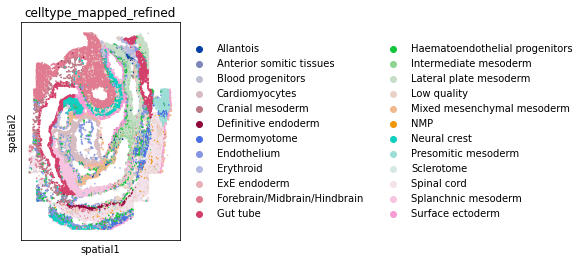

In [54]:
sc.pl.spatial(
    adata[adata.obs['embryo'] == 'embryo1'], color='celltype_mapped_refined', spot_size=2
)

Trying to set attribute `.uns` of view, copying.


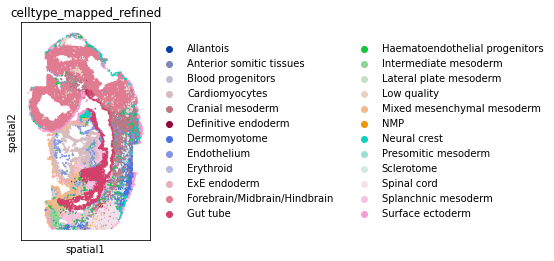

In [45]:
sc.pl.spatial(adata[adata.obs['embryo'] == 'embryo2'], color='celltype_mapped_refined', spot_size=2)

Trying to set attribute `.uns` of view, copying.


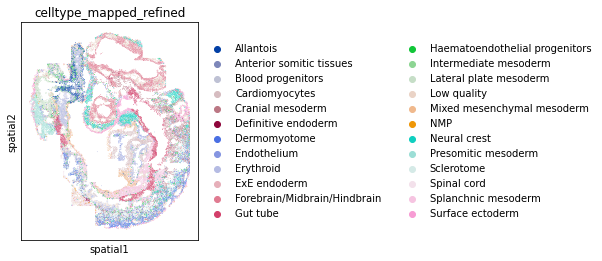

In [46]:
sc.pl.spatial(adata[adata.obs['embryo'] == 'embryo3'], color='celltype_mapped_refined', spot_size=2)

In [30]:
adata

AnnData object with n_obs × n_vars = 57101 × 387
    obs: 'uniqueID', 'embryo', 'pos', 'z', 'x_global', 'y_global', 'x_global_affine', 'y_global_affine', 'embryo_pos', 'embryo_pos_z', 'Area', 'UMAP1', 'UMAP2', 'celltype_mapped_refined'

In [31]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [32]:
adata.write(f"{datadir}preprocessed_lohoff.h5ad")

/Users/anna.schaar/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'embryo' as categorical
/Users/anna.schaar/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'pos' as categorical
/Users/anna.schaar/opt/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed 

In [83]:
# register node type names
node_type_names = list(np.unique(adata.obs['celltype_mapped_refined']))
adata.uns["node_type_names"] = {x: x for x in node_type_names}
node_types = np.zeros((adata.shape[0], len(node_type_names)))
node_type_idx = np.array(
    [
        node_type_names.index(x) for x in adata.obs['celltype_mapped_refined'].values
    ]  # index in encoding vector
)
node_types[np.arange(0, node_type_idx.shape[0]), node_type_idx] = 1
adata.obsm["node_types"] = node_types

In [84]:
image_col = 'embryo'
img_celldata = {}
for k in ['embryo1', 'embryo2', 'embryo3']:
    img_celldata[str(k)] = adata[adata.obs[image_col] == k].copy()
img_celldata = img_celldata

In [85]:
img_celldata

{'embryo1': AnnData object with n_obs × n_vars = 19451 × 387
     obs: 'uniqueID', 'embryo', 'pos', 'z', 'x_global', 'y_global', 'x_global_affine', 'y_global_affine', 'embryo_pos', 'embryo_pos_z', 'Area', 'UMAP1', 'UMAP2', 'celltype_mapped_refined'
     uns: 'node_type_names', 'log1p'
     obsm: 'spatial', 'node_types',
 'embryo2': AnnData object with n_obs × n_vars = 14891 × 387
     obs: 'uniqueID', 'embryo', 'pos', 'z', 'x_global', 'y_global', 'x_global_affine', 'y_global_affine', 'embryo_pos', 'embryo_pos_z', 'Area', 'UMAP1', 'UMAP2', 'celltype_mapped_refined'
     uns: 'node_type_names', 'log1p'
     obsm: 'spatial', 'node_types',
 'embryo3': AnnData object with n_obs × n_vars = 23194 × 387
     obs: 'uniqueID', 'embryo', 'pos', 'z', 'x_global', 'y_global', 'x_global_affine', 'y_global_affine', 'embryo_pos', 'embryo_pos_z', 'Area', 'UMAP1', 'UMAP2', 'celltype_mapped_refined'
     uns: 'node_type_names', 'log1p'
     obsm: 'spatial', 'node_types'}

<ipython-input-86-147ea89f0482>:26: RuntimeWarning: invalid value encountered in log
  feature_mat["log_expression"] = np.log(feature_mat["expression"].values + 1)


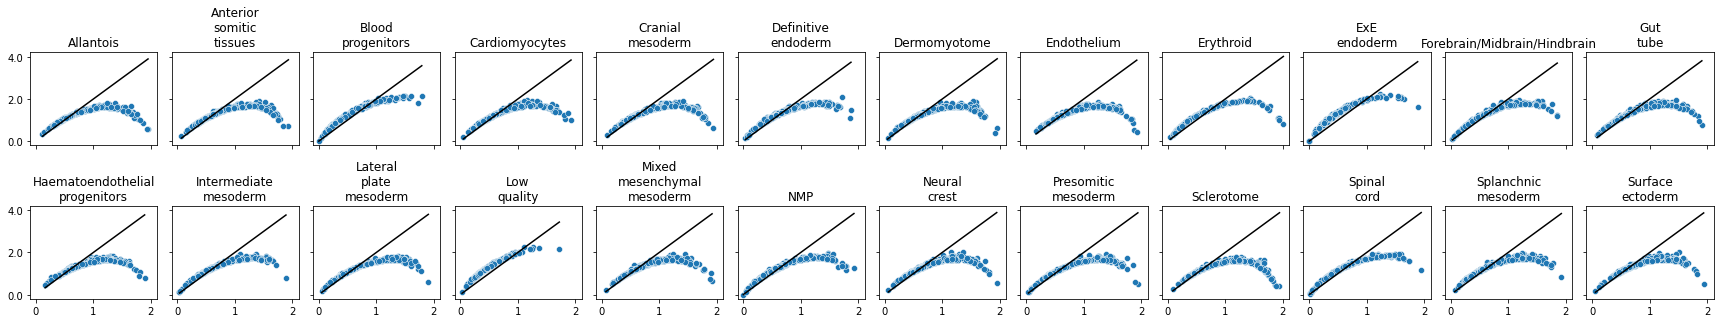

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
feature_mat = pd.concat(
    [
        pd.concat(
            [
                pd.DataFrame(
                    {
                        "image": [k for _i in range(adata.shape[0])],
                    }
                ),
                pd.DataFrame(adata.X, columns=list(adata.var_names)),
                pd.DataFrame(
                    np.asarray(list(adata.uns["node_type_names"].values()))[
                        np.argmax(adata.obsm["node_types"], axis=1)
                    ],
                    columns=["cell_type"],
                ),
            ],
            axis=1,
        ).melt(value_name="expression", var_name="gene", id_vars=["cell_type", "image"])
        for k, adata in img_celldata.items()
    ]
)
feature_mat["log_expression"] = np.log(feature_mat["expression"].values + 1)

plt.ioff()
ct = np.unique(feature_mat["cell_type"].values)
nrows = len(ct) // 12 + int(len(ct) % 12 > 0)
fig, ax = plt.subplots(
    ncols=12, nrows=nrows, figsize=(12 * 2, nrows * 2.3), sharex="all", sharey="all"
)
ax = ax.flat
for axis in ax[len(ct) :]:
    axis.remove()
for i, ci in enumerate(ct):
    tab = feature_mat.loc[feature_mat["cell_type"].values == ci, :]
    x = np.log(tab.groupby(["gene"])["expression"].mean() + 1)
    y = np.log(tab.groupby(["gene"])["expression"].var() + 1)
    sns.scatterplot(x=x, y=y, ax=ax[i])
    min_x = np.min(x) 
    max_x = np.max(x)
    sns.lineplot(x=[min_x, max_x], y=[2 * min_x, 2 * max_x], color="black", ax=ax[i])
    ax[i].grid(False)
    ax[i].set_title(ci.replace(' ', '\n'), fontsize=12)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].yaxis.set_major_formatter(FormatStrFormatter("%0.1f"))
# Save, show and return figure.
plt.tight_layout()
plt.show()